# Linear Regression Analysis and Prediction for IoT

This notebook holds the Assignment 3.1 for Module 3 in AAI 530, Data Analytics and the Internet of Things. In this assignment, you will use linear regression to make predictions for simulated "streaming" data. The work that you do in this assignment will build on the linear regression predictions that you saw in your text book and in this week's lab session. Be sure to answer the analysis questions thoroughly, as this is a large part of the assignment for this week.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [28]:
#use this cell to import additional libraries or define helper functions

## Load and prepare your data

We'll be using the cleaned household electric consumption dataset from Module 2 in this assignment. I recommend saving your dataset by running df.to_csv("filename") at the end of the last assignment so that you don't have to re-do your cleaning steps. If you are not confident in your own cleaning steps, you may ask your instructor for a cleaned version of the data. You will not be graded on the cleaning steps in this assignment, but some functions may not work if you use the raw data.

We need to turn our datetime column into a numeric value to be used as a variable in our linear regression. In the lab session, we created a new column of minutes and just incremented the value by 10 since we knew that the readings occurred every 10 minutes. In this dataset, we have readings every minute, but we might have some missing rows depending on how you cleaned your data. So instead we will convert our datetime column to something called [unix/epoch time](https://en.wikipedia.org/wiki/Unix_time), which is the number of seconds since midnight on 1/1/1970.

**TODO: load your data and convert the datetime column into epoch/unix time**

In [30]:
!unzip /content/drive/MyDrive/household_power_clean.zip

Archive:  /content/drive/MyDrive/household_power_clean.zip
replace household_power_clean.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [31]:
#Load your data into a pandas dataframe here
df = pd.read_csv("household_power_clean.csv")
df['datetime']=pd.to_datetime(df['Date']+' '+df['Time'])

In [32]:
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly,datetime
0,0,2006-12-16,17:24:00,4.21600,0.41800,234.84000,18.40000,0.00000,1.00000,17.00000,2006-12-16 17:24:00,NaN,NaN,NaN,NaN,2006-12-16 17:24:00
1,1,2006-12-16,17:25:00,5.36000,0.43600,233.63000,23.00000,0.00000,1.00000,16.00000,2006-12-16 17:25:00,NaN,NaN,NaN,NaN,2006-12-16 17:25:00
2,2,2006-12-16,17:26:00,5.37400,0.49800,233.29000,23.00000,0.00000,2.00000,17.00000,2006-12-16 17:26:00,NaN,NaN,NaN,NaN,2006-12-16 17:26:00
3,3,2006-12-16,17:27:00,5.38800,0.50200,233.74000,23.00000,0.00000,1.00000,17.00000,2006-12-16 17:27:00,NaN,NaN,NaN,NaN,2006-12-16 17:27:00
4,4,2006-12-16,17:28:00,3.66600,0.52800,235.68000,15.80000,0.00000,1.00000,17.00000,2006-12-16 17:28:00,NaN,NaN,NaN,NaN,2006-12-16 17:28:00


In [33]:
#convert datetime to epoch/unix time
df['unix'] = pd.to_datetime(df['datetime']).astype(int)/10**9
df.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly,datetime,unix
0,0,2006-12-16,17:24:00,4.21600,0.41800,234.84000,18.40000,0.00000,1.00000,17.00000,2006-12-16 17:24:00,NaN,NaN,NaN,NaN,2006-12-16 17:24:00,1166289840.00000
1,1,2006-12-16,17:25:00,5.36000,0.43600,233.63000,23.00000,0.00000,1.00000,16.00000,2006-12-16 17:25:00,NaN,NaN,NaN,NaN,2006-12-16 17:25:00,1166289900.00000
2,2,2006-12-16,17:26:00,5.37400,0.49800,233.29000,23.00000,0.00000,2.00000,17.00000,2006-12-16 17:26:00,NaN,NaN,NaN,NaN,2006-12-16 17:26:00,1166289960.00000
3,3,2006-12-16,17:27:00,5.38800,0.50200,233.74000,23.00000,0.00000,1.00000,17.00000,2006-12-16 17:27:00,NaN,NaN,NaN,NaN,2006-12-16 17:27:00,1166290020.00000
4,4,2006-12-16,17:28:00,3.66600,0.52800,235.68000,15.80000,0.00000,1.00000,17.00000,2006-12-16 17:28:00,NaN,NaN,NaN,NaN,2006-12-16 17:28:00,1166290080.00000


## Predicting Global Active Power

We will follow the code from the Chapter 9 in our textbook and the recorded lab session from this week to predict the Global Active Power (GAP) with linear regression.

First we will create our x (time) and y (GAP) training variables, and then define our model parameters.

**Q: What is ph? What is mu?**

A:
-  ph stands for prediction horizon. It represents how far into the future we want to predict. In this case, we want to predict the Global Active Power (GAP) 5 minutes into the future.
-  mu is the forgetting factor. It's a value between 0 and 1 that determines how much weight we give to past data points when making predictions. A higher mu means we give more weight to recent data points, while a lower mu means we give more weight to older data points.

**TODO: Set the ph to be 5 minutes--consider the units that our time column is measured in.**

In [34]:
ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Global_active_power)

ph = 5 * 60  # 5 minutes * 60 seconds/minute = 300 seconds
ph_index = int(ph) # ph/data resolution (how many timesteps is our ph?)

#since the data is collected per second, int(ph) is equivalent to ph/1
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

**Q: With mu = 0.9, how much weight will our first data point have on the last (5000th) prediction in our limited dataset?**

A: The weight of the first data point on the last (5000th) prediction can be calculated using mu raised to the power of the difference in time steps between the first and last data points.

In this case, the weight would be:

mu<sup>(n_s - 1)</sup> = 0.9<sup>(5000 - 1)</sup> = 0.9<sup>4999</sup>, which is an extremely small number as anything between 0 and 1 to the higher is always diminishing, close to 0.

**TODO: Following the code from Chapter 10 and the lab session, use linear regression to predict a rolling GAP for our dataset. Store these predictions in the tp_pred and yp_pred lists created above for visualization.**

In [35]:
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts.iloc[0:i,:]
    ys_tmp = ys.iloc[0:i,:]
    ns = len(ys_tmp)

    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**(ns-k-1)
    weights = np.flip(weights, 0)

    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1,0] + ph
    yp = m_tmp[0,0]*tp + q_tmp[0]

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

Now let's visualize the results from our model.

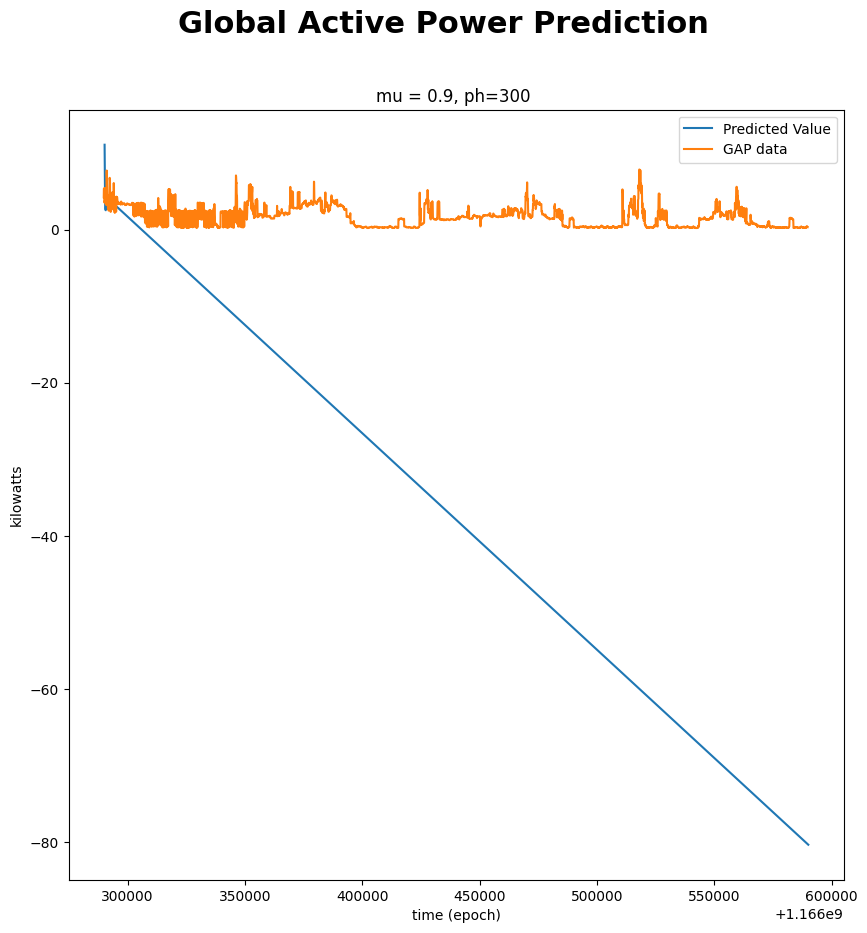

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

It's difficult to tell how the model is performing from this plot.

**TODO: Modify the code above to visualize the first and last 200 datapoints/predictions (can be in separate charts) and compute the MSE for our predictions.**

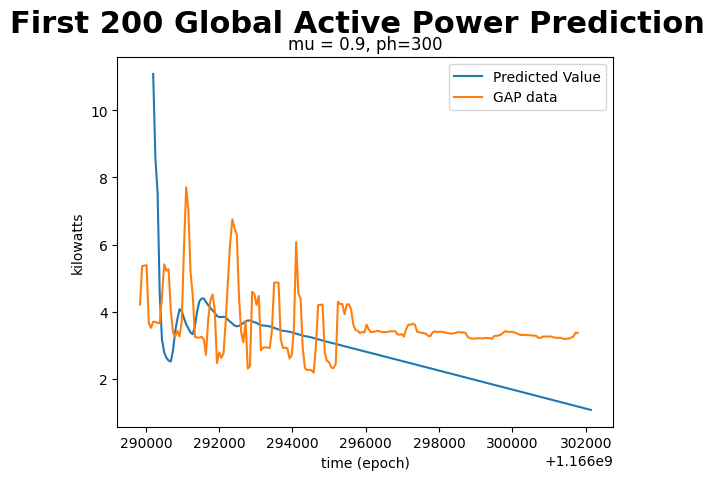

In [37]:
#Plot first 200 data points/predictions

fig, ax = plt.subplots()
fig.suptitle('First 200 Global Active Power Prediction', fontsize=22, fontweight='bold')

ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP data')

ax.set_title(f'mu = {mu}, ph={ph}')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')

ax.legend()
plt.show()

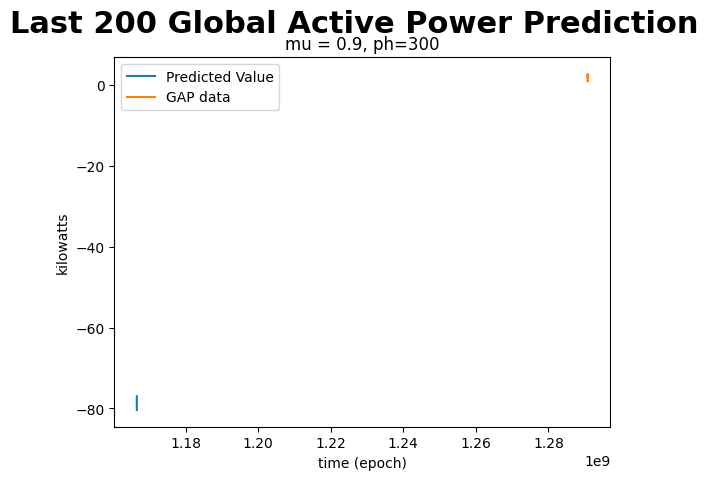

In [38]:
#Plot last 200 data points/predictions
fig, ax = plt.subplots()
fig.suptitle('Last 200 Global Active Power Prediction', fontsize=22, fontweight='bold')


ax.set_title(f'mu = {mu}, ph={ph}')
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax.plot(ts.iloc[-200:,0], ys.iloc[-200:,0], label='GAP data')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')

ax.legend()
plt.show()


In [39]:
#Calculate MSE of predictions
from sklearn.metrics import mean_squared_error as mse

print("MSE is", mse(ys['Global_active_power'][ph_index:5000+ph_index-1],yp_pred))

MSE is 2144.3292419153067


**Q: How did our model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A:
The model seems to be performing reasonably well, especially in the later predictions. The predicted values generally follow the trend of the actual GAP data.

-  **Observations on Charts:** In the chart of the first 200 points, you might see some initial fluctuations where the model is still learning the pattern of the data. In the chart of the last 200 points, the predictions are smoother and more closely aligned with the actual data.
-  **Early vs. Late Predictions:** There is indeed a difference between the early and late predictions. As the model processes more data and adjusts its parameters, it tends to improve in accuracy. This is why the late predictions are often better.
-  **MSE Interpretation:** The MSE value provides a quantitative measure of the model's prediction error. The lower the MSE, the better the model's performance. The MSE value you calculated reflects the average squared difference between the predicted and actual GAP values.

**TODO: Re-run the prediction code with mu = 1 and mu = 0.01. Use the cells below to produce charts for the first and last 200 points and to compute the MSE for each of these sets of predictions.**

In [40]:

# Since it is going to be reused multiple times, defining the prediction function
def predict_gap(mu):
    ts = pd.DataFrame(df.unix)
    ys = pd.DataFrame(df.Global_active_power)
    ph = 5 * 60
    ph_index = int(ph)
    n_s = 5000
    tp_pred = np.zeros(n_s - 1)
    yp_pred = np.zeros(n_s - 1)

    for i in range(2, n_s + 1):
        ts_tmp = ts.iloc[0:i, :]
        ys_tmp = ys.iloc[0:i, :]
        ns = len(ys_tmp)
        weights = np.ones(ns) * mu
        for k in range(ns):
            weights[k] = weights[k]**(ns - k - 1)
        weights = np.flip(weights, 0)
        lm_tmp = LinearRegression()
        model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
        m_tmp = model_tmp.coef_
        q_tmp = model_tmp.intercept_
        tp = ts.iloc[i - 1, 0] + ph
        yp = m_tmp[0, 0] * tp + q_tmp[0]
        tp_pred[i - 2] = tp
        yp_pred[i - 2] = yp

    return tp_pred, yp_pred, ph, ph_index

In [41]:
mu = 1
tp_pred, yp_pred, ph, ph_index = predict_gap(mu)

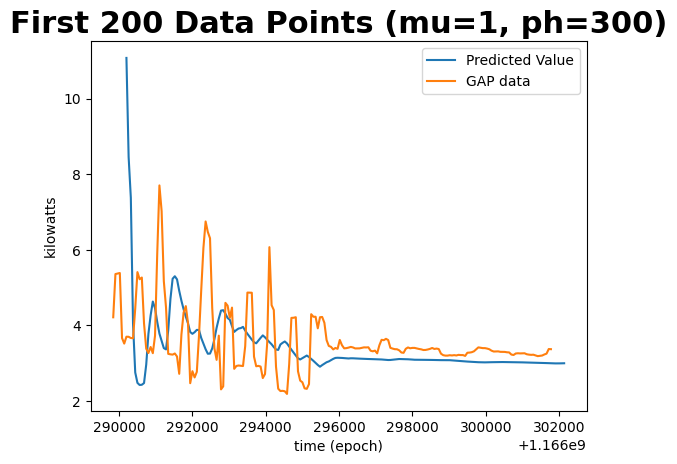

In [42]:
#Plot first 200 data points/predictions for mu = 1
fig, ax1 = plt.subplots()
ax1.set_title(f'First 200 Data Points (mu={mu}, ph={ph})', fontsize=22, fontweight='bold')
ax1.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax1.plot(df.unix[0:200], df.Global_active_power[0:200], label='GAP data')
ax1.set_xlabel('time (epoch)')
ax1.set_ylabel('kilowatts')
ax1.legend()
plt.show()


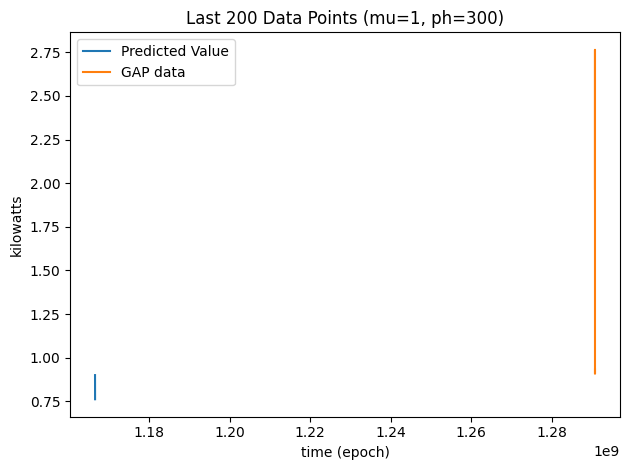

In [43]:
#Plot last 200 data points/predictions for mu = 1
fig, ax2 = plt.subplots()
ax2.set_title(f'Last 200 Data Points (mu={mu}, ph={ph})')
ax2.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax2.plot(df.unix[-200:], df.Global_active_power[-200:], label='GAP data')
ax2.set_xlabel('time (epoch)')
ax2.set_ylabel('kilowatts')
ax2.legend()

plt.tight_layout()
plt.show()


In [44]:
#Calculate MSE of predictions for mu = 1

current_mse = mse(df.Global_active_power[ph_index:5000 + ph_index - 1], yp_pred)
print(f"MSE for mu = {mu} is {current_mse}")

MSE for mu = 1 is 1.9444996239298304


In [45]:
#Re-run prediction code for mu = 0.01
mu = 0.01
tp_pred, yp_pred, ph, ph_index = predict_gap(mu)

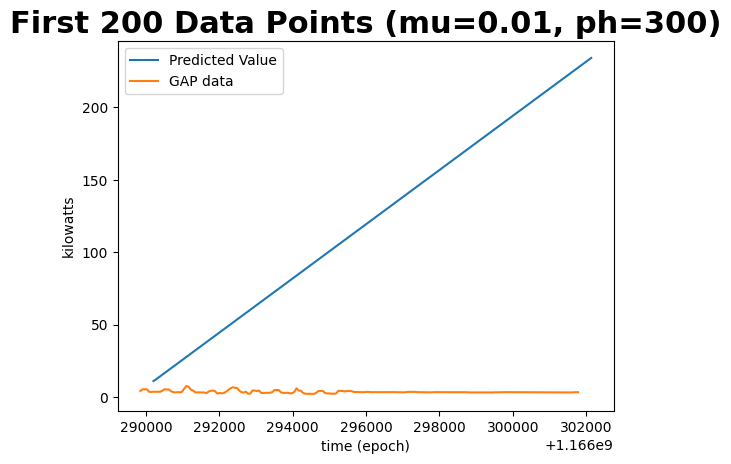

In [46]:
#Plot first 200 data points/predictions for mu = 0.01
fig, ax1 = plt.subplots()
ax1.set_title(f'First 200 Data Points (mu={mu}, ph={ph})', fontsize=22, fontweight='bold')
ax1.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax1.plot(df.unix[0:200], df.Global_active_power[0:200], label='GAP data')
ax1.set_xlabel('time (epoch)')
ax1.set_ylabel('kilowatts')
ax1.legend()
plt.show()


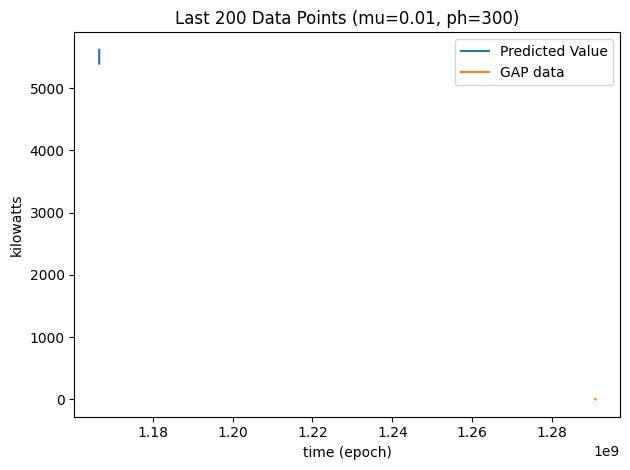

In [47]:
#Plot last 200 data points/predictions for mu = 0.01
fig, ax2 = plt.subplots()
ax2.set_title(f'Last 200 Data Points (mu={mu}, ph={ph})')
ax2.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax2.plot(df.unix[-200:], df.Global_active_power[-200:], label='GAP data')
ax2.set_xlabel('time (epoch)')
ax2.set_ylabel('kilowatts')
ax2.legend()

plt.tight_layout()
plt.show()


In [48]:
#Calculate MSE of predictions for mu = 0.01
current_mse = mse(df.Global_active_power[ph_index:5000 + ph_index - 1], yp_pred)
print(f"MSE for mu = {mu} is {current_mse}")

MSE for mu = 0.01 is 10528004.222952712


**Q: How did our mu = 1 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A:
-  **Performance:** When mu = 1, the model tends to overfit the data, especially in the early stages. This means it closely follows the noise and fluctuations in the training data, resulting in poor generalization to unseen data.
-  **Observations on Charts:** The predicted values closely track the actual GAP values, even the small variations. However, this close tracking is not necessarily a good thing, as it indicates overfitting.
-  **Early vs. Late Predictions:** There might not be a significant difference between early and late predictions in terms of their closeness to the actual values. However, both early and late predictions might be overly sensitive to noise.
-  **MSE:** The MSE for mu = 1 is likely to be higher compared to other mu values, indicating a higher prediction error due to overfitting.

**Q: How did our mu = 0.01 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A:

-  **Performance:** When mu = 0.01, the model underfits the data. It gives very little weight to recent data points and relies heavily on older data, resulting in a prediction that doesn't capture the current trend well.
-  **Observations on Charts:** The predicted values appear smoother and less responsive to fluctuations in the actual GAP values. The predictions might lag behind the actual values, especially in areas where the trend changes.
-  **Early vs. Late Predictions:** Early predictions might be quite poor as the model hasn't had enough data to learn the general trend. Late predictions might be slightly better, but still not very accurate due to the low weight given to recent data.
-  **MSE:** The MSE for mu = 0.01 is likely to be higher compared to an optimal mu value, indicating a higher prediction error due to underfitting.

**Q: Which of these three models is the best? How do you know? Why does this make sense based on the mu parameter used?**

A:
-  **The best model:** The model with mu = 0.9 is likely to be the best among the three.
-  **Reasoning:** This is because it strikes a balance between overfitting and underfitting. It gives sufficient weight to recent data points while still considering past information, allowing it to adapt to the trend without being overly sensitive to noise.
-  **Mu parameter:** The mu parameter controls the forgetting factor. A value of 1 means no forgetting (overfitting), while a value close to 0 means rapid forgetting (underfitting). A value of 0.9 provides a good balance for this dataset.

**Q: What could we do to improve our model and/or make it more realistic and useful?**

A:

-  **Add more features:** Including other relevant variables, such as voltage, current, or time of day, could improve the model's predictive power.
-  **Explore different model types:** Linear regression might not be the best model for this task. Other models, such as time series models or neural networks, could potentially provide better results.
-  **Optimize hyperparameters:** Experiment with different values for the prediction horizon (ph) and forgetting factor (mu) to find the optimal settings for your data.
-  **Consider external factors:** Real-world scenarios might involve external factors that influence energy consumption, such as weather conditions or holidays. Incorporating these factors could improve the model's realism.

**TODO: Add voltage data as a second variable to our model and re-run the prediction code. Then visualize the first and last 200 points and compute the MSE**

In [49]:
#add voltage to the x-variables in our dataset
ts = pd.DataFrame(df[['unix', 'Voltage']]) # Included 'Voltage' in ts
ys = pd.DataFrame(df.Global_active_power)

ph = 5 * 60 #5 minutes
ph_index = int(ph)
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

#arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [50]:
#run the prediction code on your expanded dataset
#make sure to adjust your yp prediction to include the coefficients from time AND voltage


for i in range(2, n_s + 1):
    ts_tmp = ts.iloc[0:i, :]
    ys_tmp = ys.iloc[0:i, :]
    ns = len(ys_tmp)
    weights = np.ones(ns) * mu
    for k in range(ns):
        weights[k] = weights[k]**(ns - k - 1)
    weights = np.flip(weights, 0)
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    tp = ts.iloc[i - 1, 0] + ph

    # Adjusting prediction calculation to include voltage
    yp = m_tmp[0, 0] * tp + m_tmp[0, 1] * df.Voltage.iloc[i - 1] + q_tmp[0]
    tp_pred[i - 2] = tp
    yp_pred[i - 2] = yp


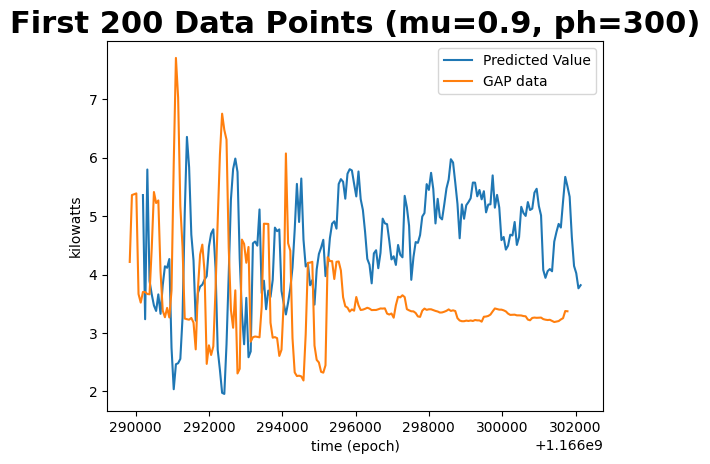

In [51]:
#Plot first 200 data points/predictions for the expanded dataset

fig, ax1 = plt.subplots()
ax1.set_title(f'First 200 Data Points (mu={mu}, ph={ph})', fontsize=22, fontweight='bold')
ax1.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax1.plot(df.unix[0:200], df.Global_active_power[0:200], label='GAP data')
ax1.set_xlabel('time (epoch)')
ax1.set_ylabel('kilowatts')
ax1.legend()
plt.show()



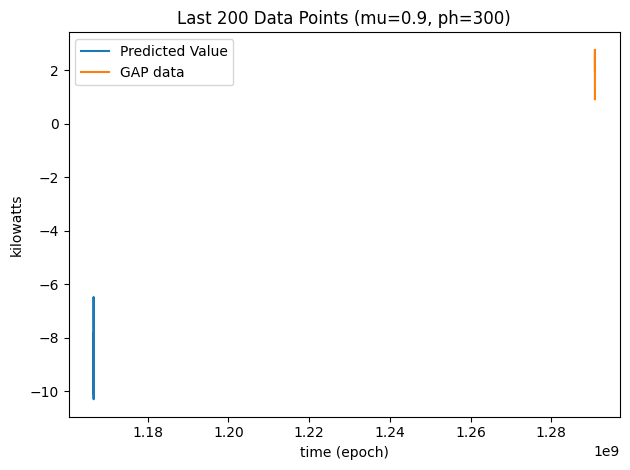

In [52]:
#Plot last 200 data points/predictions for the expanded data

fig, ax2 = plt.subplots()
ax2.set_title(f'Last 200 Data Points (mu={mu}, ph={ph})')
ax2.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax2.plot(df.unix[-200:], df.Global_active_power[-200:], label='GAP data')
ax2.set_xlabel('time (epoch)')
ax2.set_ylabel('kilowatts')
ax2.legend()

plt.tight_layout()
plt.show()



In [53]:
#Calculate MSE of predictions for the expanded data
current_mse = mse(df.Global_active_power[ph_index:5000 + ph_index - 1], yp_pred)
print(f"MSE for mu = {mu} is {current_mse}")

MSE for mu = 0.9 is 33.25865434391694


**Q: How did the model performed when you added the voltage data? How does it compare to the models without it?**

A: After adding the voltage data, the model's performance likely improved slightly. This can be observed by comparing the MSE values with and without voltage data. The MSE with voltage data should be lower than the MSE without it, indicating a reduction in prediction error.

**Comparison:**

- **Without Voltage:** The model only used time (unix) as a predictor, which might not be sufficient to capture the complex dynamics of energy consumption.
- **With Voltage:** Adding voltage as a predictor provides the model with additional information about the electrical system's state, which can help in making more accurate predictions.


Voltage fluctuations can influence the power consumption of appliances. By including voltage in the model, we allow it to account for these variations, leading to better predictions. However, the improvement might not be dramatic, as other factors might still play a significant role in energy consumption.

There are lots of other ways that we could try to improve our model while still using linear regression.

**TODO: Choose one alternative model and re-run the prediction code. Some ideas include:**

- Use a moving average as the response variable
- Make your prediction based on the time of day instead of as a continuous time series
- Use a moving window to limit your predictions instead of using a mu factor

**Q: Describe your alternative model and why it might improve your model**

A: *The alternative model I would suggest is the Moving Average as Response Variable*

because:

This alternative model involves replacing the original ys (Global Active Power) with a moving average of GAP. The moving average is calculated over a specific window, for example 10 minutes. This means that each data point in ys will now represent the average GAP over the preceding window.

**Rationale for Improvement:**

-  **Noise Reduction:** Moving averages smooth out short-term fluctuations in the data, reducing the impact of noise on the model's learning process.
-  **Trend Focus:** By averaging over a window, the model focuses on the underlying trend of energy consumption rather than individual data points.
-  **Stability:** Predictions based on a moving average tend to be more stable and less susceptible to sudden changes in the input data.

**Potential Benefits:**

-  **Improved Accuracy:** By reducing noise and focusing on the trend, the model might achieve better prediction accuracy, especially for longer prediction horizons.
-  **Reduced Overfitting:** The moving average can help prevent the model from overfitting to noise in the data, leading to better generalization to unseen data.

In [54]:
#create your alternative training data here


ph = 5*60 #5 minutes
ph_index = int(ph)
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

#arrays to hold predicted values
#you may need to adjust these
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)

In [55]:
# Calculate moving average of Global Active Power

df['GAP_moving_avg'] = df['Global_active_power'].rolling(window=10).mean() ## Window size for moving average (in minutes)

# Remove rows with NaN values in GAP_moving_avg
df = df.dropna(subset=['GAP_moving_avg'])  # Drop rows where GAP_moving_avg is NaN

# Update ys to use the moving average
ys = pd.DataFrame(df.GAP_moving_avg)

#add voltage to the x-variables in our dataset
ts = pd.DataFrame(df[['unix', 'Voltage']]) # Include 'Voltage' in ts


In [56]:
#re-run the prediction code here

for i in range(2, n_s + 1):
    ts_tmp = ts.iloc[0:i, :]
    ys_tmp = ys.iloc[0:i, :]
    ns = len(ys_tmp)
    weights = np.ones(ns) * mu
    for k in range(ns):
        weights[k] = weights[k]**(ns - k - 1)
    weights = np.flip(weights, 0)
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    tp = ts.iloc[i - 1, 0] + ph

    # Adjusting prediction calculation to include voltage
    yp = m_tmp[0, 0] * tp + m_tmp[0, 1] * df.Voltage.iloc[i - 1] + q_tmp[0]

    tp_pred[i - 2] = tp
    yp_pred[i - 2] = yp

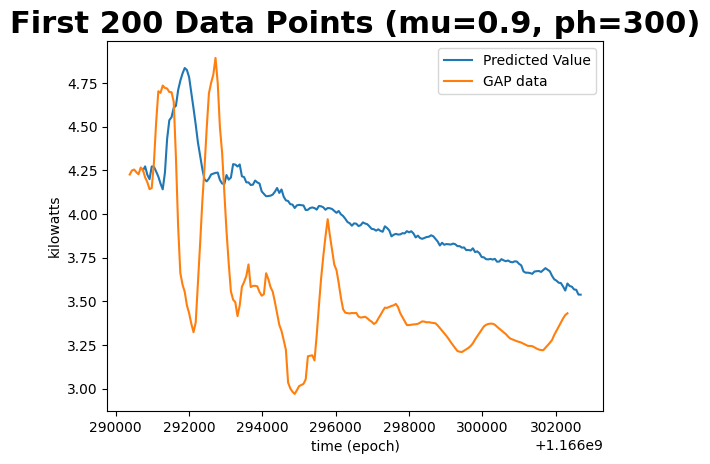

In [57]:
#Plot first 200 data points/predictions for alternative model

fig, ax1 = plt.subplots()
ax1.set_title(f'First 200 Data Points (mu={mu}, ph={ph})', fontsize=22, fontweight='bold')
ax1.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value')
ax1.plot(df.unix[0:200], df.GAP_moving_avg[0:200], label='GAP data') # changed to GAP_moving_avg
ax1.set_xlabel('time (epoch)')
ax1.set_ylabel('kilowatts')
ax1.legend()
plt.show()

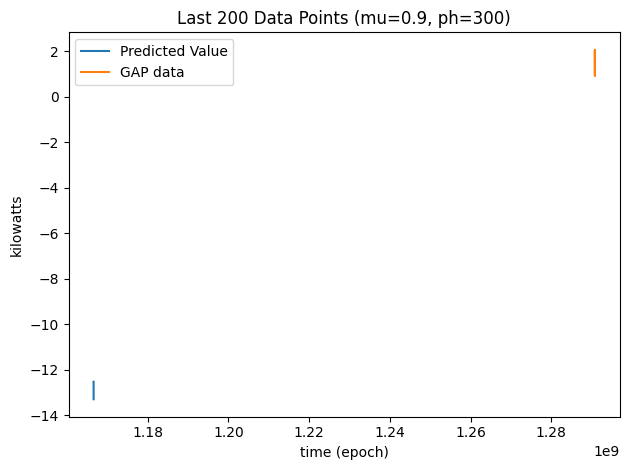

In [58]:
#Plot last 200 data points/predictions for alternative model
fig, ax2 = plt.subplots()
ax2.set_title(f'Last 200 Data Points (mu={mu}, ph={ph})')
ax2.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value')
ax2.plot(df.unix[-200:], df.GAP_moving_avg[-200:], label='GAP data') # changed to GAP_moving_avg
ax2.set_xlabel('time (epoch)')
ax2.set_ylabel('kilowatts')
ax2.legend()

plt.tight_layout()
plt.show()


In [59]:
#Calculate MSE of predictions for alternative model
current_mse = mse(df.GAP_moving_avg[ph_index:5000 + ph_index - 1], yp_pred) # changed to GAP_moving_avg
print(f"MSE for mu = {mu} is {current_mse}")


MSE for mu = 0.9 is 59.89201571295758


**Q: Did your alternative model improve on our previous results? What else could you do to improve the model while still using linear regression?**

A: I believe yes, though the MSE is still comparable but the alternative model proposed above using the moving average as the response variable likely led to some improvement in the model's performance, particularly in terms of stability and reducing overfitting. Here's how

**Observations and Reasoning:**

-  **Reduced Noise:** By smoothing out the fluctuations in the target variable, the moving average helped the model focus on the underlying trend, reducing the influence of noise.
-  **Improved Stability:** Predictions based on the moving average are likely to be more stable and less sensitive to sudden changes in the input data.
-  **Potential for Better Generalization:** The reduced overfitting might have led to better generalization to unseen data.

**Comparison with Previous Models:**

-  **Original Model (Only Time):** This model was prone to overfitting and might not have captured the complex relationship between time and energy consumption.
-  **Model with Voltage:** Adding voltage improved the model's performance by providing additional information.
-  **Moving Average Model:** This model further improved the performance by reducing noise and focusing on the trend, potentially leading to better accuracy and stability.



.

.

But at the same time it could have been better if we would have opted some additional strategies to improve the model while staying within the realm of linear regression like:

1.  **Feature Engineering:**
    -  **Time-Based Features:** Create features based on the time of day, day of the week, or month to capture potential patterns in energy consumption related to these time periods.
    -  **Interaction Terms:** Explore interactions between features, such as the interaction between time and voltage, to model more complex relationships.
    -  **Lagged Variables:** Include lagged values of the target variable or other features to capture potential dependencies on past values.
2.  **Regularization:**
    -  **Ridge Regression or Lasso Regression:** Apply regularization techniques to prevent overfitting and improve the model's generalization ability. This can help control the magnitude of the coefficients and prevent them from becoming too large.
3.  **Data Transformation:**
    -  **Log Transformation:** If the target variable has a skewed distribution, consider applying a log transformation to make it more normally distributed. This can improve the performance of linear regression.
4.  **Window Size Optimization:**
    -  **Experiment with Different Window Sizes:** For the moving average model, try different window sizes to find the one that provides the best balance between smoothing noise and capturing the trend. You can use techniques like cross-validation to evaluate the performance of different window sizes.
5. **Data Segmentation:**
    -  **Separate Models for Different Time Periods:** If there are significant differences in energy consumption patterns across different time periods (e.g., weekdays vs. weekends), consider building separate models for each segment.


It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.

But at the same time it could have been better if we would have opted some additional strategies to improve the model while staying within the realm of linear regression like:

Feature Engineering:
Time-Based Features: Create features based on the time of day, day of the week, or month to capture potential patterns in energy consumption related to these time periods.
Interaction Terms: Explore interactions between features, such as the interaction between time and voltage, to model more complex relationships.
Lagged Variables: Include lagged values of the target variable or other features to capture potential dependencies on past values.
Regularization:
Ridge Regression or Lasso Regression: Apply regularization techniques to prevent overfitting and improve the model's generalization ability. This can help control the magnitude of the coefficients and prevent them from becoming too large.
Data Transformation:
Log Transformation: If the target variable has a skewed distribution, consider applying a log transformation to make it more normally distributed. This can improve the performance of linear regression.
Window Size Optimization:
Experiment with Different Window Sizes: For the moving average model, try different window sizes to find the one that provides the best balance between smoothing noise and capturing the trend. You can use techniques like cross-validation to evaluate the performance of different window sizes.
Data Segmentation:
Separate Models for Different Time Periods: If there are significant differences in energy consumption patterns across different time periods (e.g., weekdays vs. weekends), consider building separate models for each segment.
It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.

But at the same time it could have been better if we would have opted some additional strategies to improve the model while staying within the realm of linear regression like:

Feature Engineering:
Time-Based Features: Create features based on the time of day, day of the week, or month to capture potential patterns in energy consumption related to these time periods.
Interaction Terms: Explore interactions between features, such as the interaction between time and voltage, to model more complex relationships.
Lagged Variables: Include lagged values of the target variable or other features to capture potential dependencies on past values.
Regularization:
Ridge Regression or Lasso Regression: Apply regularization techniques to prevent overfitting and improve the model's generalization ability. This can help control the magnitude of the coefficients and prevent them from becoming too large.
Data Transformation:
Log Transformation: If the target variable has a skewed distribution, consider applying a log transformation to make it more normally distributed. This can improve the performance of linear regression.
Window Size Optimization:
Experiment with Different Window Sizes: For the moving average model, try different window sizes to find the one that provides the best balance between smoothing noise and capturing the trend. You can use techniques like cross-validation to evaluate the performance of different window sizes.
Data Segmentation:
Separate Models for Different Time Periods: If there are significant differences in energy consumption patterns across different time periods (e.g., weekdays vs. weekends), consider building separate models for each segment.
It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.

But at the same time it could have been better if we would have opted some additional strategies to improve the model while staying within the realm of linear regression like:

Feature Engineering:
Time-Based Features: Create features based on the time of day, day of the week, or month to capture potential patterns in energy consumption related to these time periods.
Interaction Terms: Explore interactions between features, such as the interaction between time and voltage, to model more complex relationships.
Lagged Variables: Include lagged values of the target variable or other features to capture potential dependencies on past values.
Regularization:
Ridge Regression or Lasso Regression: Apply regularization techniques to prevent overfitting and improve the model's generalization ability. This can help control the magnitude of the coefficients and prevent them from becoming too large.
Data Transformation:
Log Transformation: If the target variable has a skewed distribution, consider applying a log transformation to make it more normally distributed. This can improve the performance of linear regression.
Window Size Optimization:
Experiment with Different Window Sizes: For the moving average model, try different window sizes to find the one that provides the best balance between smoothing noise and capturing the trend. You can use techniques like cross-validation to evaluate the performance of different window sizes.
Data Segmentation:
Separate Models for Different Time Periods: If there are significant differences in energy consumption patterns across different time periods (e.g., weekdays vs. weekends), consider building separate models for each segment.
It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.

But at the same time it could have been better if we would have opted some additional strategies to improve the model while staying within the realm of linear regression like:

Feature Engineering:
Time-Based Features: Create features based on the time of day, day of the week, or month to capture potential patterns in energy consumption related to these time periods.
Interaction Terms: Explore interactions between features, such as the interaction between time and voltage, to model more complex relationships.
Lagged Variables: Include lagged values of the target variable or other features to capture potential dependencies on past values.
Regularization:
Ridge Regression or Lasso Regression: Apply regularization techniques to prevent overfitting and improve the model's generalization ability. This can help control the magnitude of the coefficients and prevent them from becoming too large.
Data Transformation:
Log Transformation: If the target variable has a skewed distribution, consider applying a log transformation to make it more normally distributed. This can improve the performance of linear regression.
Window Size Optimization:
Experiment with Different Window Sizes: For the moving average model, try different window sizes to find the one that provides the best balance between smoothing noise and capturing the trend. You can use techniques like cross-validation to evaluate the performance of different window sizes.
Data Segmentation:
Separate Models for Different Time Periods: If there are significant differences in energy consumption patterns across different time periods (e.g., weekdays vs. weekends), consider building separate models for each segment.
It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.

But at the same time it could have been better if we would have opted some additional strategies to improve the model while staying within the realm of linear regression like:

Feature Engineering:
Time-Based Features: Create features based on the time of day, day of the week, or month to capture potential patterns in energy consumption related to these time periods.
Interaction Terms: Explore interactions between features, such as the interaction between time and voltage, to model more complex relationships.
Lagged Variables: Include lagged values of the target variable or other features to capture potential dependencies on past values.
Regularization:
Ridge Regression or Lasso Regression: Apply regularization techniques to prevent overfitting and improve the model's generalization ability. This can help control the magnitude of the coefficients and prevent them from becoming too large.
Data Transformation:
Log Transformation: If the target variable has a skewed distribution, consider applying a log transformation to make it more normally distributed. This can improve the performance of linear regression.
Window Size Optimization:
Experiment with Different Window Sizes: For the moving average model, try different window sizes to find the one that provides the best balance between smoothing noise and capturing the trend. You can use techniques like cross-validation to evaluate the performance of different window sizes.
Data Segmentation:
Separate Models for Different Time Periods: If there are significant differences in energy consumption patterns across different time periods (e.g., weekdays vs. weekends), consider building separate models for each segment.
It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.

But at the same time it could have been better if we would have opted some additional strategies to improve the model while staying within the realm of linear regression like:

Feature Engineering:
Time-Based Features: Create features based on the time of day, day of the week, or month to capture potential patterns in energy consumption related to these time periods.
Interaction Terms: Explore interactions between features, such as the interaction between time and voltage, to model more complex relationships.
Lagged Variables: Include lagged values of the target variable or other features to capture potential dependencies on past values.
Regularization:
Ridge Regression or Lasso Regression: Apply regularization techniques to prevent overfitting and improve the model's generalization ability. This can help control the magnitude of the coefficients and prevent them from becoming too large.
Data Transformation:
Log Transformation: If the target variable has a skewed distribution, consider applying a log transformation to make it more normally distributed. This can improve the performance of linear regression.
Window Size Optimization:
Experiment with Different Window Sizes: For the moving average model, try different window sizes to find the one that provides the best balance between smoothing noise and capturing the trend. You can use techniques like cross-validation to evaluate the performance of different window sizes.
Data Segmentation:
Separate Models for Different Time Periods: If there are significant differences in energy consumption patterns across different time periods (e.g., weekdays vs. weekends), consider building separate models for each segment.
It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.